In [1]:
#1 Reading in the csv-files
import pandas as pd
import matplotlib.pyplot as plt
movieData= pd.read_csv('./Data/movies.csv', dtype={'movieId': 'int32', 'title': 'str'})
ratingData = pd.read_csv('./Data/ratings.csv', dtype={'movieId': 'int32', 'title': 'str',})
movieData.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
#1.1b Most rated movies
nr_of_ratings_top_10 = ratingData["movieId"].value_counts().sort_values(ascending=False)
test = ratingData.iloc(axis=1)[:0].head(10)
top10_list = []
title_list = []
for i in range(10):
    top10_list.append(movieData.loc[movieData['movieId'] == nr_of_ratings_top_10.index[i]])
    title_list.append(str(top10_list[i].title))
top10_list

[     movieId                             title       genres
 315      318  Shawshank Redemption, The (1994)  Crime|Drama,
      movieId                title                    genres
 352      356  Forrest Gump (1994)  Comedy|Drama|Romance|War,
      movieId                title                       genres
 293      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller,
      movieId                             title                 genres
 587      593  Silence of the Lambs, The (1991)  Crime|Horror|Thriller,
       movieId               title                  genres
 2487     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller,
      movieId                                      title  \
 257      260  Star Wars: Episode IV - A New Hope (1977)   
 
                       genres  
 257  Action|Adventure|Sci-Fi  ,
      movieId                 title                            genres
 476      480  Jurassic Park (1993)  Action|Adventure|Sci-Fi|Thriller,
      movieId                    ti

In [3]:
#1.1c Most rated movies
sum_of_ratings = 0
amount_of_ratings = 0
average_rating_top_10_most_rated_movies = []
for i in range(10):
    temporary_list = ratingData[ratingData['movieId'] == nr_of_ratings_top_10.index[i]]
    sum_of_ratings += sum(temporary_list["rating"])
    amount_of_ratings += nr_of_ratings_top_10.iloc[i]
    average_rating_top_10_most_rated_movies.append(sum(temporary_list["rating"])/nr_of_ratings_top_10.iloc[i])

print(f"Average rating after taken account the top 10 most rated movies: {sum_of_ratings/amount_of_ratings:.3}")

Average rating after taken account the top 10 most rated movies: 4.1


<BarContainer object of 10 artists>

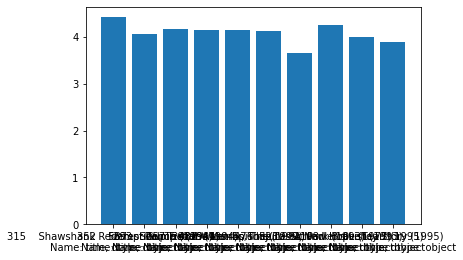

In [4]:
plt.bar(x=title_list, height = average_rating_top_10_most_rated_movies)

In [5]:
from datetime import datetime
listalist = []
ratingData_timestamp = ratingData
#testData["timestamp"].iloc[0]
ratingData_timestamp.drop_duplicates(subset ="movieId",
                     keep = "last", inplace = True)

for i in range(len(ratingData_timestamp["timestamp"])):
    listalist.append(datetime.fromtimestamp(ratingData_timestamp["timestamp"].iloc[i], tz=None).year)



ratingData_timestamp["year"] = listalist

ratings_per_year = ratingData_timestamp["year"].value_counts()
ratings_per_year = ratings_per_year.sort_values(axis = "index")
ratings_per_year


1998      111
1999      191
1997      203
1996      442
2002      481
2001      513
2008      583
2007      586
2000      660
2005      777
2006      793
2003      838
2004      847
2009     1266
2010     1303
2013     1366
2012     1599
2014     1673
2011     2123
2015     6295
2016     8980
2018     9801
2017    12458
Name: year, dtype: int64

In [6]:
import re
year_list = []
for i in range(len(movieData["title"])):
    movieData["title"].iloc[1]
    X = re.findall('[0-9]+', movieData["title"].iloc[i])
    try:    
        if int(X[0]) > 1870 and int(X[0]) < 2023: 
           year_list.append(int(X[0]))
    except IndexError:
            year_list.append(0)


In [7]:
import seaborn as sns
test = pd.DataFrame(year_list).value_counts()
test = test.drop(0)
test = test.sort_index()
plt.bar(test)

C:\Users\fredr\AppData\Local\Temp\ipykernel_36724\2356741690.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  test = test.drop(0)


TypeError: bar() missing 1 required positional argument: 'height'

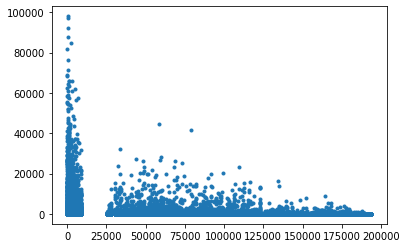

In [ ]:
ratingData = pd.read_csv('./Data/ratings.csv', dtype={'movieId': 'int32', 'title': 'str',})
nr_of_ratings_per_movie_id = ratingData["movieId"].value_counts().sort_values(ascending=False)
nr_of_ratings_per_movie_id



plt.plot(nr_of_ratings_per_movie_id, ".")